# Stats701 Homework 10, Winter 2018
### Mengyi Yuan
#### wendymy@umich.edu

### Problem 1: Warmup: Constructing a 3-tensor
Problem 1 took me 0.5 hours.

In [2]:
import tensorflow as tf
import numpy as np

In [2]:
nplogo = np.array([[[0,0,1],[0,0,1],[0,0,1],[1,1,1]],
                   [[0,0,0],[0,0,0],[0,0,1],[0,0,0]],
                   [[0,0,0],[0,0,0],[0,1,1],[0,0,0]],
                   [[0,0,0],[0,0,0],[0,0,1],[0,0,0]],
                   [[0,0,0],[0,0,0],[0,0,1],[0,0,0]]])
# nplogo.shape

In [10]:
sess = tf.Session()
tflogo = tf.constant(nplogo, dtype = tf.int8)
print(tflogo.eval(session=sess))

[[[0 0 1]
  [0 0 1]
  [0 0 1]
  [1 1 1]]

 [[0 0 0]
  [0 0 0]
  [0 0 1]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 1 1]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 1]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 1]
  [0 0 0]]]


### Problem 2: Building and training simple models
Problem 2 took me 6 hours.

In [46]:
# 2.1
sess = tf.Session()
# define the placeholders 
x = tf.placeholder(tf.float32, [None, 6])
ytrue = tf.placeholder(tf.float32, [None, 1])
# define the parameter
W = tf.Variable(tf.zeros([6,1]))
b = tf.Variable(tf.zeros([1]))
# define the model
z = tf.matmul(x,W) + b
y = tf.sigmoid(z)
log_likelihood = tf.reduce_sum(ytrue*tf.log(y) + (1-ytrue)*tf.log(1-y))
loss = -log_likelihood

In [47]:
# 2.2
# read the files
xtrain = np.load('logistic_xtrain.npy')
ytrain = np.load('logistic_ytrain.npy')

In [48]:
# train the model
train_step = tf.train.GradientDescentOptimizer(0.001).minimize(loss)

# start session
sess = tf.InteractiveSession()
tf.global_variables_initializer().run()

losses = list(np.zeros(1000))
for i in range(1000):
    sess.run(train_step, feed_dict={x:xtrain, ytrue:ytrain})
    losses[i] = sess.run(loss, feed_dict={x:xtrain, ytrue:ytrain})

estimates = sess.run([W,b])
print(estimates)

[array([[1.0127133],
       [0.7975773],
       [2.1573465],
       [2.8610227],
       [4.6311736],
       [7.626854 ]], dtype=float32), array([-0.8423636], dtype=float32)]


To choose the appropriate learning rate and the training steps, I printed out the losses after each step of optimization and choose the learning rate and training steps where the losses become stable.

In [49]:
# 2.3
# read the files
xtest = np.load('logistic_xtest.npy')
ytest = np.load('logistic_ytest.npy')

In [50]:
test_loss = sess.run(loss, feed_dict={x:xtest, ytrue:ytest})
print(test_loss)

161.88974


In [53]:
# 2.4
W_true = tf.constant(np.array([[1],[1],[2],[3],[5],[8]]), dtype = tf.float32)
b_true = tf.constant([-1], dtype = tf.float32)
sq_errs = tf.reduce_sum(tf.reduce_sum(tf.square(estimates[0] - W_true)) + tf.square(estimates[1] - b_true))

In [54]:
print(sq_errs.eval())

0.3853293


In [34]:
# 2.5
normal_xtrain = np.load('normal_xtrain.npy')
normal_ytrain = np.load('normal_ytrain.npy')

In [35]:
# define the placeholders 
x_norm = tf.placeholder(tf.float32, [None, 1])
ytrue_norm = tf.placeholder(tf.float32, [None, 3])
# define the variables 
mu = tf.Variable(tf.zeros([1,3]),dtype=tf.float32)
sigma = tf.Variable(tf.ones([1,3]),dtype=tf.float32)

dist = tf.distributions.Normal(loc=mu, scale=sigma)
p = dist.prob(x_norm)
cross_entropy = -tf.reduce_sum(tf.log(p)*ytrue_norm)

train_step = tf.train.AdagradOptimizer(0.13).minimize(cross_entropy)
#sess.run(cross_entropy, feed_dict={x:normal_xtrain, ytrue:normal_ytrain})

In [36]:
sess = tf.InteractiveSession()
tf.global_variables_initializer().run()

ce = list(np.zeros(1200))
for i in range(1200):
    sess.run(train_step, feed_dict={x_norm:normal_xtrain, ytrue_norm:normal_ytrain})
    ce[i] = sess.run(cross_entropy, feed_dict={x_norm:normal_xtrain, ytrue_norm:normal_ytrain})

In [37]:
estimates = sess.run([mu,sigma**2])
print(estimates)

[array([[-0.98101056,  0.00807607,  3.017122  ]], dtype=float32), array([[0.51141727, 1.0041908 , 1.4122176 ]], dtype=float32)]


In [38]:
# 2.6
# load the data
normal_xtest = np.load('normal_xtest.npy')
normal_ytest = np.load('normal_ytest.npy')

In [39]:
ce_test = sess.run(cross_entropy, feed_dict={x_norm:normal_xtest, ytrue_norm:normal_ytest})

In [40]:
ce_test

676.5294

In [41]:
# 2.7
estimates_norm = sess.run([mu,sigma])
mu_est = tf.constant(estimates_norm[0], dtype = tf.float32)
sigma_est = tf.square(tf.constant(estimates_norm[1], dtype = tf.float32))
mu_true = tf.constant([[-1.,0.,3.]], dtype = tf.float32)
sigma_true = tf.constant([[0.5,1.,1.5]], dtype = tf.float32)

In [42]:
squared_err_norm = tf.reduce_sum(tf.square(mu_est - mu_true)) + tf.reduce_sum(tf.square(sigma_est - sigma_true))
print(squared_err_norm.eval())

0.008572649


In [43]:
# 2.8
#p_est = sess.run(p, feed_dict={x_norm:normal_xtest, ytrue_norm:normal_ytest})
incorrect_prediction = tf.not_equal(tf.argmax(p,1), tf.argmax(normal_ytest,1))
err_rate = tf.reduce_mean(tf.cast(incorrect_prediction, tf.float32))
print(sess.run(err_rate, feed_dict={x_norm:normal_xtest, ytrue_norm:normal_ytest}))

0.28


### Problem 3: Building a Complicated Model
Problem 3 took me 1 hour.

The following problem is a working example of Vector Representations of Words retrieved from:
https://www.tensorflow.org/tutorials/word2vec

In [270]:
# import modules
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import collections
import math
import os
import sys
import argparse
import random
from tempfile import gettempdir
import zipfile

import numpy as np
from six.moves import urllib
from six.moves import xrange  # pylint: disable=redefined-builtin
import tensorflow as tf

from tensorflow.contrib.tensorboard.plugins import projector

In [271]:
# Step 1: Download the data.
url = 'http://mattmahoney.net/dc/'


# pylint: disable=redefined-outer-name
def maybe_download(filename, expected_bytes):
  """Download a file if not present, and make sure it's the right size."""
  local_filename = os.path.join(gettempdir(), filename)
  if not os.path.exists(local_filename):
    local_filename, _ = urllib.request.urlretrieve(url + filename,
                                                   local_filename)
  statinfo = os.stat(local_filename)
  if statinfo.st_size == expected_bytes:
    print('Found and verified', filename)
  else:
    print(statinfo.st_size)
    raise Exception('Failed to verify ' + local_filename +
                    '. Can you get to it with a browser?')
  return local_filename


filename = maybe_download('text8.zip', 31344016)


# Read the data into a list of strings.
def read_data(filename):
  """Extract the first file enclosed in a zip file as a list of words."""
  with zipfile.ZipFile(filename) as f:
    data = tf.compat.as_str(f.read(f.namelist()[0])).split()
  return data


vocabulary = read_data(filename)
print('Data size', len(vocabulary))

Found and verified text8.zip
Data size 17005207


In [272]:
# Step 2: Build the dictionary and replace rare words with UNK token.
vocabulary_size = 50000


def build_dataset(words, n_words):
  """Process raw inputs into a dataset."""
  count = [['UNK', -1]]
  count.extend(collections.Counter(words).most_common(n_words - 1))
  dictionary = dict()
  for word, _ in count:
    dictionary[word] = len(dictionary)
  data = list()
  unk_count = 0
  for word in words:
    index = dictionary.get(word, 0)
    if index == 0:  # dictionary['UNK']
      unk_count += 1
    data.append(index)
  count[0][1] = unk_count
  reversed_dictionary = dict(zip(dictionary.values(), dictionary.keys()))
  return data, count, dictionary, reversed_dictionary


# Filling 4 global variables:
# data - list of codes (integers from 0 to vocabulary_size-1).
#   This is the original text but words are replaced by their codes
# count - map of words(strings) to count of occurrences
# dictionary - map of words(strings) to their codes(integers)
# reverse_dictionary - maps codes(integers) to words(strings)
data, count, dictionary, reverse_dictionary = build_dataset(
    vocabulary, vocabulary_size)
del vocabulary  # Hint to reduce memory.
print('Most common words (+UNK)', count[:5])
print('Sample data', data[:10], [reverse_dictionary[i] for i in data[:10]])

data_index = 0

Most common words (+UNK) [['UNK', 418391], ('the', 1061396), ('of', 593677), ('and', 416629), ('one', 411764)]
Sample data [5234, 3081, 12, 6, 195, 2, 3134, 46, 59, 156] ['anarchism', 'originated', 'as', 'a', 'term', 'of', 'abuse', 'first', 'used', 'against']


In [273]:
# Step 3: Function to generate a training batch for the skip-gram model.
def generate_batch(batch_size, num_skips, skip_window):
  global data_index
  assert batch_size % num_skips == 0
  assert num_skips <= 2 * skip_window
  batch = np.ndarray(shape=(batch_size), dtype=np.int32)
  labels = np.ndarray(shape=(batch_size, 1), dtype=np.int32)
  span = 2 * skip_window + 1  # [ skip_window target skip_window ]
  buffer = collections.deque(maxlen=span)  # pylint: disable=redefined-builtin
  if data_index + span > len(data):
    data_index = 0
  buffer.extend(data[data_index:data_index + span])
  data_index += span
  for i in range(batch_size // num_skips):
    context_words = [w for w in range(span) if w != skip_window]
    words_to_use = random.sample(context_words, num_skips)
    for j, context_word in enumerate(words_to_use):
      batch[i * num_skips + j] = buffer[skip_window]
      labels[i * num_skips + j, 0] = buffer[context_word]
    if data_index == len(data):
      buffer.extend(data[0:span])
      data_index = span
    else:
      buffer.append(data[data_index])
      data_index += 1
  # Backtrack a little bit to avoid skipping words in the end of a batch
  data_index = (data_index + len(data) - span) % len(data)
  return batch, labels


batch, labels = generate_batch(batch_size=8, num_skips=2, skip_window=1)
for i in range(8):
  print(batch[i], reverse_dictionary[batch[i]], '->', labels[i, 0],
        reverse_dictionary[labels[i, 0]])

3081 originated -> 5234 anarchism
3081 originated -> 12 as
12 as -> 6 a
12 as -> 3081 originated
6 a -> 195 term
6 a -> 12 as
195 term -> 2 of
195 term -> 6 a


In [275]:
# Step 4: Build and train a skip-gram model.

batch_size = 128
embedding_size = 128  # Dimension of the embedding vector.
skip_window = 1  # How many words to consider left and right.
num_skips = 2  # How many times to reuse an input to generate a label.
num_sampled = 64  # Number of negative examples to sample.

# We pick a random validation set to sample nearest neighbors. Here we limit the
# validation samples to the words that have a low numeric ID, which by
# construction are also the most frequent. These 3 variables are used only for
# displaying model accuracy, they don't affect calculation.
valid_size = 16  # Random set of words to evaluate similarity on.
valid_window = 100  # Only pick dev samples in the head of the distribution.
valid_examples = np.random.choice(valid_window, valid_size, replace=False)

graph = tf.Graph()

with graph.as_default():

  # Input data.
  with tf.name_scope('inputs'):
    train_inputs = tf.placeholder(tf.int32, shape=[batch_size])
    train_labels = tf.placeholder(tf.int32, shape=[batch_size, 1])
    valid_dataset = tf.constant(valid_examples, dtype=tf.int32)

  # Ops and variables pinned to the CPU because of missing GPU implementation
  with tf.device('/cpu:0'):
    # Look up embeddings for inputs.
    with tf.name_scope('embeddings'):
      embeddings = tf.Variable(
          tf.random_uniform([vocabulary_size, embedding_size], -1.0, 1.0))
      embed = tf.nn.embedding_lookup(embeddings, train_inputs)

    # Construct the variables for the NCE loss
    with tf.name_scope('weights'):
      nce_weights = tf.Variable(
          tf.truncated_normal(
              [vocabulary_size, embedding_size],
              stddev=1.0 / math.sqrt(embedding_size)))
    with tf.name_scope('biases'):
      nce_biases = tf.Variable(tf.zeros([vocabulary_size]))

  # Compute the average NCE loss for the batch.
  # tf.nce_loss automatically draws a new sample of the negative labels each
  # time we evaluate the loss.
  # Explanation of the meaning of NCE loss:
  #   http://mccormickml.com/2016/04/19/word2vec-tutorial-the-skip-gram-model/
  with tf.name_scope('loss'):
    loss = tf.reduce_mean(
        tf.nn.nce_loss(
            weights=nce_weights,
            biases=nce_biases,
            labels=train_labels,
            inputs=embed,
            num_sampled=num_sampled,
            num_classes=vocabulary_size))

  # Add the loss value as a scalar to summary.
  tf.summary.scalar('loss', loss)

  # Construct the SGD optimizer using a learning rate of 1.0.
  with tf.name_scope('optimizer'):
    optimizer = tf.train.GradientDescentOptimizer(1.0).minimize(loss)

  # Compute the cosine similarity between minibatch examples and all embeddings.
  norm = tf.sqrt(tf.reduce_sum(tf.square(embeddings), 1, keepdims=True))
  normalized_embeddings = embeddings / norm
  valid_embeddings = tf.nn.embedding_lookup(normalized_embeddings,
                                            valid_dataset)
  similarity = tf.matmul(
      valid_embeddings, normalized_embeddings, transpose_b=True)

  # Merge all summaries.
  merged = tf.summary.merge_all()

  # Add variable initializer.
  init = tf.global_variables_initializer()

  # Create a saver.
  saver = tf.train.Saver()

In [278]:
# Step 5: Begin training.
nsteps = 80001

with tf.Session(graph=graph) as session:
  # We must initialize all variables before we use them.
  init.run()
  print('Initialized')

  average_loss = 0
  for step in xrange(nsteps):
    batch_inputs, batch_labels = generate_batch(
        batch_size, num_skips, skip_window)
    feed_dict = {train_inputs: batch_inputs, train_labels: batch_labels}

    # We perform one update step by evaluating the optimizer op (including it
    # in the list of returned values for session.run()
    _, loss_val = session.run([optimizer, loss], feed_dict=feed_dict)
    average_loss += loss_val

    if step % 2000 == 0:
      if step > 0:
        average_loss /= 2000
      # The average loss is an estimate of the loss over the last 2000 batches.
      print('Average loss at step ', step, ': ', average_loss)
      average_loss = 0

    # Note that this is expensive (~20% slowdown if computed every 500 steps)
    if step % 10000 == 0:
      sim = similarity.eval()
      for i in xrange(valid_size):
        valid_word = reverse_dictionary[valid_examples[i]]
        top_k = 8  # number of nearest neighbors
        nearest = (-sim[i, :]).argsort()[1:top_k + 1]
        log_str = 'Nearest to %s:' % valid_word
        for k in xrange(top_k):
          close_word = reverse_dictionary[nearest[k]]
          log_str = '%s %s,' % (log_str, close_word)
        print(log_str)
  final_embeddings = normalized_embeddings.eval()

Initialized
Average loss at step  0 :  296.58978271484375
Nearest to been: mattingly, bursting, symbiotic, mattress, external, houdini, bius, checking,
Nearest to all: compendium, eicher, wicklow, mired, rockefeller, glimpse, maple, duelling,
Nearest to time: linemen, upbringing, transposing, parasite, teng, limitation, nel, contradiction,
Nearest to use: hormones, quarried, cajun, corrects, acm, transitioning, nep, dew,
Nearest to th: ornate, bis, kaltenbrunner, giver, impression, gulfs, phallus, toledo,
Nearest to between: heroines, repressed, purists, tremolo, loans, ambushed, bleeding, barriers,
Nearest to called: grandiose, browed, highways, pharisees, queensland, butler, mazar, miyamoto,
Nearest to used: furniture, hardship, pros, sheds, vitis, dms, intonation, manufactured,
Nearest to also: seed, oeuvre, freddy, ojibwe, sailplane, rectal, governing, requesting,
Nearest to UNK: uncommon, backlight, speculated, cornelis, cheung, cabaret, objector, aba,
Nearest to four: bison, cuko

Average loss at step  52000 :  5.048043882608414
Average loss at step  54000 :  5.194275532841682
Average loss at step  56000 :  5.056914161682129
Average loss at step  58000 :  5.081810565471649
Average loss at step  60000 :  4.95520276772976
Nearest to been: by, be, was, were, bpp, had, microbats, trent,
Nearest to all: these, three, two, archaeopteryx, several, mukherjee, karpov, aroused,
Nearest to time: ursus, pulau, dasyprocta, ginsberg, walsh, basins, joram, ockham,
Nearest to use: circ, hormones, scroll, gollancz, vma, agouti, agave, coalition,
Nearest to th: six, seven, eight, zero, nine, three, four, anonymity,
Nearest to between: with, in, against, from, during, pulau, somoza, desperate,
Nearest to called: arctos, wizard, unimpeded, miyamoto, erected, considered, himmler, litre,
Nearest to used: known, manufactured, defend, sheds, sponsors, furniture, aquarius, seen,
Nearest to also: which, not, now, often, abet, alpina, isu, birkenau,
Nearest to UNK: dasyprocta, michelob, o

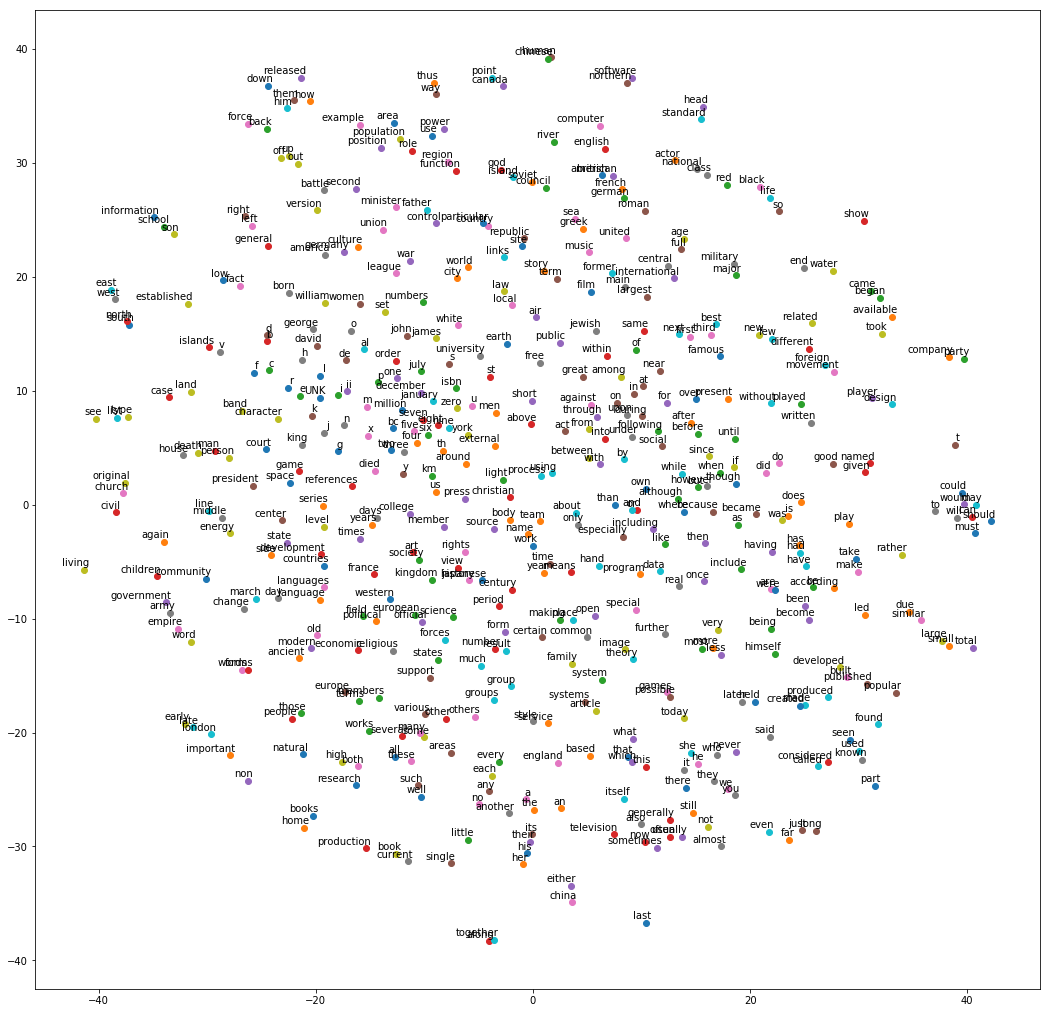

In [280]:
# Step 6: Visualize the embeddings.


# pylint: disable=missing-docstring
# Function to draw visualization of distance between embeddings.
def plot_with_labels(low_dim_embs, labels, filename):
  assert low_dim_embs.shape[0] >= len(labels), 'More labels than embeddings'
  plt.figure(figsize=(18, 18))  # in inches
  for i, label in enumerate(labels):
    x, y = low_dim_embs[i, :]
    plt.scatter(x, y)
    plt.annotate(
        label,
        xy=(x, y),
        xytext=(5, 2),
        textcoords='offset points',
        ha='right',
        va='bottom')

  plt.savefig(filename)


try:
  # pylint: disable=g-import-not-at-top
  from sklearn.manifold import TSNE
  import matplotlib.pyplot as plt

  tsne = TSNE(
      perplexity=30, n_components=2, init='pca', n_iter=5000, method='exact')
  plot_only = 500
  low_dim_embs = tsne.fit_transform(final_embeddings[:plot_only, :])
  labels = [reverse_dictionary[i] for i in xrange(plot_only)]
  plot_with_labels(low_dim_embs, labels, os.path.join(gettempdir(), 'tsne.png'))

except ImportError as ex:
  print('Please install sklearn, matplotlib, and scipy to show embeddings.')
  print(ex)

### Problem 4: Running Models on Google Cloud Platform
Problem 4 took me 6 hour.

In [12]:
# 4.2
# train and save the model
normal_xtrain = np.load('normal_xtrain.npy')
normal_ytrain = np.load('normal_ytrain.npy')

# define the placeholders 
x_norm = tf.placeholder(tf.float32, [None, 1])
ytrue_norm = tf.placeholder(tf.float32, [None, 3])
# define the variables 
mu = tf.Variable(tf.zeros([1,3]),dtype=tf.float32)
sigma = tf.Variable(tf.ones([1,3]),dtype=tf.float32)

dist = tf.distributions.Normal(loc=mu, scale=sigma)
p = dist.prob(x_norm)
cross_entropy = -tf.reduce_sum(tf.log(p)*ytrue_norm)

train_step = tf.train.AdagradOptimizer(0.13).minimize(cross_entropy)

sess = tf.InteractiveSession()
tf.global_variables_initializer().run()

for _ in range(1200):
    sess.run(train_step, feed_dict={x_norm:normal_xtrain, ytrue_norm:normal_ytrain})


y_pred = tf.one_hot(tf.argmax(p,1), depth = 3)

In [13]:
tf.saved_model.simple_save(sess, 'wendymy_normal_trained',
            inputs={"x": x_norm}, outputs={"prediction": y_pred})

INFO:tensorflow:Assets added to graph.
INFO:tensorflow:No assets to write.
INFO:tensorflow:SavedModel written to: b'wendymy_normal_trained/saved_model.pb'
